<a href="https://colab.research.google.com/github/gauriagarwal18/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/master/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

## Attribute Information

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

##Reading Data And Importing Libraries Required For Analysis

In [605]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [606]:
#Download datasets 
from google.colab import drive
drive.mount('/content/drive')
import os
path="/content/drive/My Drive/AlmaBetter_Capstone_projects/capstone_project3/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv"
insurance_original=pd.read_csv(path,parse_dates=[2,3])
insurance= insurance_original.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data Cleaning And Description

In [607]:
insurance.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


From above we note that:
- in gender we have to do encoding, for male and female
- in vehical age we have to check the number of categories and then we will try to do ordinal encoding
- We will normalize the column of annual premium

In [608]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  object 
 3   Driving_License       381109 non-null  object 
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 34.9+ MB


- there is no null value in the data
- but we note that some columns are of object type so we will convert it to int to ensure that there is no garbage value

In [609]:
insurance_describe=insurance.describe()  #later we have to change some columns so for some information is required for analysis so we store this result
insurance_describe

,id,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [610]:
insurance.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [611]:
def remove_outliers2(df,continuous_col=[]):

  if len(continuous_col)==0:

   continuous_col=df.describe().columns
  df[continuous_col].boxplot(rot=90)
  plt.title("before removing outliers",)
  plt.show()
  
  for c in continuous_col:
    df.index=np.arange(0,df.shape[0])
    Q1=np.quantile(df[c],0.25)
    Q3=np.quantile(df[c],0.75)
    IQR= Q3 - Q1
    upper=np.where(df[c]>=(Q3+1.5*IQR))[0]
    #print(upper[0])
    lower=np.where(df[c]<=(Q1-1.5*IQR))[0]   #it will be a tuple and we require a numpy array which is at it's first index.
    #print(lower)
    outliers_idx=np.unique(np.append(upper,lower)) 
    df.drop(outliers_idx, inplace = True) 
    
    #df.loc[upper][c]=Q3
    #df.loc[lower][c]=Q1
     
  df[continuous_col].boxplot(rot=90)
  plt.title("after removing outliers",)
  plt.show()
  return df

In [612]:
insurance.shape

(381109, 12)

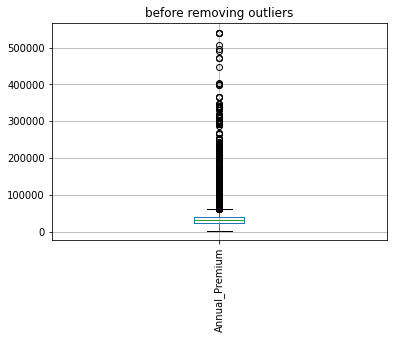

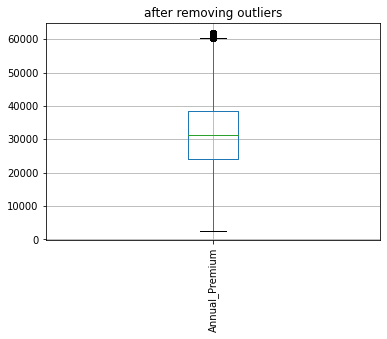

In [613]:
insurance = remove_outliers2(insurance,["Annual_Premium"])

In [614]:
insurance.shape

(370789, 12)

In [615]:
insurance_describe=insurance.describe()  #later we have to change some columns so for some information is required for analysis so we store this result
insurance_describe

,id,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000
mean,190534.855484,26.437281,0.459666,29264.643973,112.542923,154.345442,0.121781
std,110036.802591,13.310391,0.498371,14743.056656,54.039616,83.670478,0.327033
min,1.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95219.000000,15.000000,0.000000,24102.000000,30.000000,82.000000,0.000000
50%,190529.000000,28.000000,0.000000,31319.000000,151.000000,154.000000,0.000000
75%,285823.000000,36.000000,1.000000,38596.000000,152.000000,227.000000,0.000000
max,381109.000000,52.000000,1.000000,61892.000000,163.000000,299.000000,1.000000


##Feature Engineering

###Some Basic Requirements

In [616]:
column_drop=[]  #here we will append all the columns one-by-one which are needed to drop so drop function needs not to be executed again and again

In [617]:
insurance.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [618]:
#now we note that all the features in our data are numerical
continuous_features=["Annual_Premium","Vintage",'Age']
categorical_features=[ 'Gender', 'Driving_License', 'Region_Code','Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response']

In [619]:
def percentage_response(df,indep_col,dep_col):
  col_response=pd.crosstab(df[indep_col],df[dep_col])
  col_response_percentage=col_response.copy()
  total = col_response[0]+col_response[1]
  col_response_percentage[0] = round((col_response[0]/total)*100,2)
  col_response_percentage[1] = round((col_response[1]/total)*100,2)
  col_response_percentage.sort_values(by=1,inplace=True,ascending=False)
  return col_response_percentage
    


###Encoding Categorical Variables

In [620]:
#changing gender and vehical damage to 0,1:
"""
in gender
0- male
1- female

in Vehical_Damage
0- no
1- yes

"""

'\nin gender\n0- male\n1- female\n\nin Vehical_Damage\n0- no\n1- yes\n\n'

In [621]:
gender_dict={"Male":0,"Female":1}
for c in insurance["Gender"].unique():
  insurance["Gender"][insurance["Gender"]==c]=gender_dict[c]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [622]:
damage_dict={"Yes":1,"No":0}
for c in insurance["Vehicle_Damage"].unique():
  insurance["Vehicle_Damage"][insurance["Vehicle_Damage"]==c]=damage_dict[c]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [623]:
#now changing vehical age, so checking the  different categories it is having
insurance["Vehicle_Age"].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

from above we note that vehical age is categorized into three types:
0- age is less than 1 year
1- age is between 1-2 years
2- age is greater than 2 years

so for this feature we will do ordinal encoding 

In [624]:
age_dict={"< 1 Year":0,"1-2 Year":1,"> 2 Years":2}

In [625]:
insurance["Vehicle_Age"]=insurance["Vehicle_Age"].replace(age_dict)

In [626]:
#now all the columns in data are integer columns so changing their dtype
for c in insurance.columns:
  insurance[c]=pd.to_numeric(insurance[c])

In [627]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370789 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    370789 non-null  int64  
 1   Gender                370789 non-null  int64  
 2   Age                   370789 non-null  int64  
 3   Driving_License       370789 non-null  int64  
 4   Region_Code           370789 non-null  float64
 5   Previously_Insured    370789 non-null  int64  
 6   Vehicle_Age           370789 non-null  int64  
 7   Vehicle_Damage        370789 non-null  int64  
 8   Annual_Premium        370789 non-null  float64
 9   Policy_Sales_Channel  370789 non-null  float64
 10  Vintage               370789 non-null  int64  
 11  Response              370789 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 36.8 MB


###Feature Engineering on Categorical Data

####Basic Information

In [628]:
#counting the number of unique values in each feature
for c in categorical_features:
  print(f"number of unique values in column {c}: {(insurance[c].unique()).size}")

number of unique values in column Gender: 2
number of unique values in column Driving_License: 2
number of unique values in column Region_Code: 53
number of unique values in column Previously_Insured: 2
number of unique values in column Vehicle_Age: 3
number of unique values in column Vehicle_Damage: 2
number of unique values in column Policy_Sales_Channel: 155
number of unique values in column Response: 2


- **id**: the column id is of no use as it is just showing the id of a customer which is unique for every row, so it does'nt effect our result
- Gender: no feature engineering required
- **Region Code**: In this we have to observe some important points to check how this feature is useful.
- Previously_Insured: no feature engineering required
- Vehical_Age: no feature engineering required
- Vehical_Damage: no feature engineering requiredd
- **Policy_sales_channels**: There are total 155 policy sales channels, let's check if there is any particular order or we have to perform some feature engineering
- response: no feature engineering required

In [629]:
column_drop.append("id")

In [630]:
#value_counts for categorical features

for c in categorical_features:
  print(f"for column {c}:\n{insurance[c].value_counts()}","\n")

for column Gender:
0    200319
1    170470
Name: Gender, dtype: int64 

for column Driving_License:
1    370026
0       763
Name: Driving_License, dtype: int64 

for column Region_Code:
28.0    99741
8.0     32069
46.0    19628
41.0    17941
15.0    13178
30.0    12179
29.0    10871
50.0    10188
3.0      9172
11.0     9116
36.0     8700
33.0     7613
47.0     7418
35.0     6883
6.0      6273
45.0     5571
37.0     5483
18.0     5115
48.0     4681
14.0     4647
39.0     4558
10.0     4364
21.0     4257
2.0      4038
13.0     4029
12.0     3188
7.0      3168
9.0      3094
27.0     2816
32.0     2786
43.0     2616
26.0     2584
17.0     2535
25.0     2491
24.0     2408
0.0      2019
38.0     2006
16.0     2006
31.0     1960
23.0     1958
20.0     1934
49.0     1824
4.0      1796
34.0     1656
19.0     1534
22.0     1298
40.0     1285
5.0      1275
1.0      1008
44.0      805
42.0      590
52.0      262
51.0      174
Name: Region_Code, dtype: int64 

for column Previously_Insured:
0    20

####Feature Engineering on Region_Code column

In [631]:
insurance["Region_Code"].value_counts()  #here no region code have very less value, so we cannot include others here 

28.0    99741
8.0     32069
46.0    19628
41.0    17941
15.0    13178
30.0    12179
29.0    10871
50.0    10188
3.0      9172
11.0     9116
36.0     8700
33.0     7613
47.0     7418
35.0     6883
6.0      6273
45.0     5571
37.0     5483
18.0     5115
48.0     4681
14.0     4647
39.0     4558
10.0     4364
21.0     4257
2.0      4038
13.0     4029
12.0     3188
7.0      3168
9.0      3094
27.0     2816
32.0     2786
43.0     2616
26.0     2584
17.0     2535
25.0     2491
24.0     2408
0.0      2019
38.0     2006
16.0     2006
31.0     1960
23.0     1958
20.0     1934
49.0     1824
4.0      1796
34.0     1656
19.0     1534
22.0     1298
40.0     1285
5.0      1275
1.0      1008
44.0      805
42.0      590
52.0      262
51.0      174
Name: Region_Code, dtype: int64

In [632]:
region_response_percentage=percentage_response(insurance,"Region_Code","Response")


In [633]:
region_Response_dict=dict(region_response_percentage[1])
insurance["Region_Response"]=insurance["Region_Code"].replace(region_Response_dict)


In [634]:
column_drop.append("Region_Code")
continuous_features.append("Region_Response")
categorical_features.remove("Region_Code")

####Policy Sales Channel
From value counts we observe that there is no particular trend in the column, also some of the channels have very less contribution

In [635]:
#from above in policy sales channel we note that at last channels are very less active channels at beginning are more useful

channels=insurance["Policy_Sales_Channel"].value_counts()
lesser_insurance=channels.index[channels.values<100]

#these all indexes have less than 100 contribution which is very less as compared to higher contributions as be observed from above so let's consider
#these all as 1 channel with index  0.0

to_0=[True if c in lesser_insurance else False for c in insurance["Policy_Sales_Channel"] ]
insurance["Policy_Sales_Channel"][to_0]=0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [636]:
insurance["Policy_Sales_Channel"].value_counts()

152.0    132168
26.0      76375
124.0     71902
160.0     21489
156.0     10591
          ...  
127.0       105
113.0       104
119.0       101
135.0       101
54.0        100
Name: Policy_Sales_Channel, Length: 63, dtype: int64

Now we have added a new column named Channel Response which shows the percentage of customers for a given policy channel who takes vehical insurance, as there are so many policy channels and there is no particular order so after adding this useful column we will drop policy channel column

In [637]:
channel_response_percentage=percentage_response(insurance,"Policy_Sales_Channel","Response")

In [638]:
Channel_Response_dict=dict(channel_response_percentage[1])
insurance["Channel_Response"]=insurance["Policy_Sales_Channel"].replace(Channel_Response_dict)
column_drop.append("Policy_Sales_Channel")
continuous_features.append("Channel_Response")
categorical_features.remove("Policy_Sales_Channel")

###Feature Engineering on Continuous Attributes

####Basic Understanding

In [639]:
continuous_features

['Annual_Premium', 'Vintage', 'Age', 'Region_Response', 'Channel_Response']

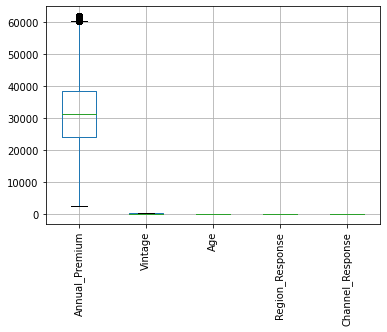

In [640]:
insurance[continuous_features].boxplot(rot=90)   #here we note that we do not have any outlier in our data

In [641]:
for c in continuous_features:
  print(f"number of unique values in column {c}: {(insurance[c].unique()).size}")

number of unique values in column Annual_Premium: 41667
number of unique values in column Vintage: 290
number of unique values in column Age: 66
number of unique values in column Region_Response: 51
number of unique values in column Channel_Response: 62


- Annual_Premium: We will normalize this column
- vintage: observe if there is any correlation with response or not
- Age: observe if there is any correlation with response or not, if we are able to note some trend then we will divide ages in some categories and make age a categorical column.
- We will do nothing with Region_Responses and Channel_Responses as we have added them using feature engineering and there is no need to make any changes

####Normalising Annual_Premium

In [642]:
def normalization(df,col_list):

  for c1 in col_list:
    try:
      mx=df.max()[c1]
      mn=df.min()[c1]
      df[c1]=(df[c1]-mn)/(mx-mn)
      col_list.remove(c1)    #so that c1 do  not get normalized again and again
    except:
      print(f"{c1} is not a numerical column, so it can not be normalized")
      col_list.remove(c1)
      normalization(df,col_list)
  return df

In [643]:
insurance=normalization(insurance,["Annual_Premium"])

####Vintage

In [644]:
insurance["Vintage"].value_counts()
#vintage column is not showing very much variation there are all categories of people, those who are old customers to those who have recently joined.

256    1382
73     1375
282    1361
126    1355
158    1354
       ... 
224    1204
89     1201
205    1198
32     1194
277    1179
Name: Vintage, Length: 290, dtype: int64

In [645]:
percentage_response(insurance,"Vintage","Response")
#here we note that vintage does not very much affect the percentage or probabililty of person's response so we will drop this column


Response,0,1
Vintage,,
220,85.44,14.56
212,85.63,14.37
164,85.70,14.30
189,85.78,14.22
11,85.86,14.14
...,...,...
78,89.66,10.34
156,89.68,10.32
273,89.72,10.28


In [646]:
column_drop.append("Vintage")
continuous_features.remove("Vintage")

####Age 

In [647]:
insurance[["Age"]].agg(["min","max"])

,Age
min,20
max,85


here we note that the minimum age of a customer is 20 and the maximum age is 85

In [648]:
insurance["Age"].value_counts()

24    25400
23    23810
22    20572
25    20159
21    16161
      ...  
81       53
82       28
83       21
84       11
85       10
Name: Age, Length: 66, dtype: int64

In [649]:
pd.crosstab(insurance["Age"],insurance["Response"])

Response,0,1
Age,,
20,5979,171
21,15599,562
22,19824,748
23,22935,875
24,24501,899
...,...,...
81,49,4
82,27,1
83,20,1


let's try dividing age in three categories
40 and below 40- 0
40-60- 1
60above- 2

In [650]:
insurance["Age_Section"]=insurance["Age"].copy()

In [651]:
insurance["Age_Section"][insurance["Age"]<=40]=0
insurance["Age_Section"][(insurance["Age"]>40)&(insurance["Age"]<=60)]=1
insurance["Age_Section"][insurance["Age"]>60]=2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [652]:
pd.crosstab(insurance["Age_Section"],insurance["Response"],margins=True)


Response,0,1,All
Age_Section,,,
0,193825,18390,212215
1,94630,22851,117481
2,37179,3914,41093
All,325634,45155,370789


From here we note that most of the peoples are from 20-40 age group, also the people from age group 2 that is 40-60 are the peoples having the highest number of positive responses, so this means that if a person belongs to this age category than he will more prefer the vehical insurance, so this classification of age is working good for us, so we will keep column age_section and drop age column

In [653]:
percentage_response(insurance,"Age_Section","Response")

Response,0,1
Age_Section,,
1,80.55,19.45
2,90.48,9.52
0,91.33,8.67


In [654]:
column_drop.append("Age")
continuous_features.remove("Age")
categorical_features.append("Age_Section")

###Target Column
If we found that the target column is biased we have to perform add some rows with the minority class as 1

In [655]:
insurance["Response"].value_counts()         #our target column is biased

0    325634
1     45155
Name: Response, dtype: int64

In [656]:
45155/(325634+45155)    #we have only 12% entries for positive response, so our model will not be able to get trends

0.12178085110399715

####Over sampling using smote of target column

In [657]:
insurance["Response"].value_counts()   
#here the ratio is very less if i take number of positive response to be 250000 that this ratio will be improved

0    325634
1     45155
Name: Response, dtype: int64

In [658]:
30000/(30000+325634)  # this ratio is not bad.

0.08435638887170518

In [659]:
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
smote=BorderlineSMOTE(sampling_strategy={0:325634,1:300000})
x=insurance.loc[:, insurance.columns != 'Response']
y=insurance["Response"]
x_smote, y_smote = smote.fit_resample(x, y)

In [660]:
insurance.drop(list(insurance.columns),axis=1,inplace=True)

In [661]:
insurance=x_smote
insurance["Response"]=y_smote

In [662]:
insurance.shape

(625634, 15)

In [663]:
insurance["Response"].value_counts()

0    325634
1    300000
Name: Response, dtype: int64

###Final Information:


In [664]:
column_drop  #columns we are droping

['id', 'Region_Code', 'Policy_Sales_Channel', 'Vintage', 'Age']

In [665]:
insurance.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Region_Response',
       'Channel_Response', 'Age_Section', 'Response'],
      dtype='object')

In [666]:
insurance.shape

(625634, 15)

In [667]:
insurance.drop(column_drop,axis=1,inplace=True)

In [668]:
insurance.columns

Index(['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Region_Response',
       'Channel_Response', 'Age_Section', 'Response'],
      dtype='object')

In [669]:
insurance.shape

(625634, 10)

In [670]:
categorical_features

['Gender',
 'Driving_License',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Response',
 'Age_Section']

In [671]:
continuous_features

['Annual_Premium', 'Region_Response', 'Channel_Response']

##EDA: Exploratory Data Analysis

Let's now do some exploratory analysis on our to draw some conclusion, important for real world and for our model as well.

###Univariate Analysis
here we will analyse the distribution of continuous columns,
and visualize the distribution of our categorrical columns through pie chart

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f4552b9d0>,
      dtype=object)

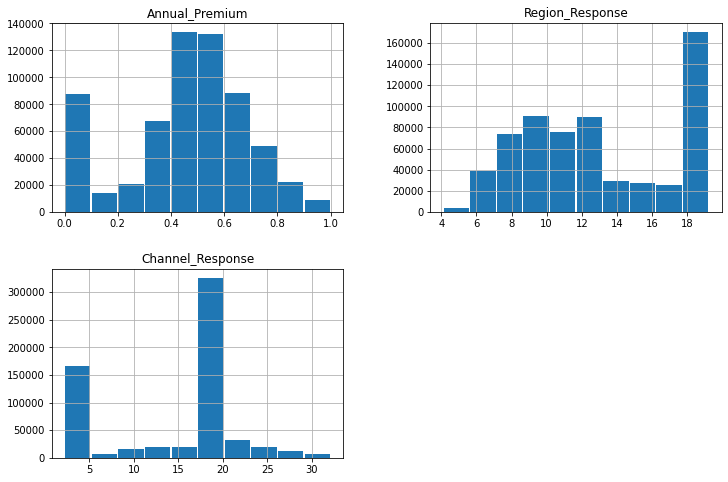

In [672]:
insurance[continuous_features].hist(figsize=(12,8), rwidth=0.95)


- From above we note that there are very less number of companies that have very high annual premium
- In channel response either the percentage of response is mainly between 0-5 or between 15-20

so we can categorize this column as

0- percentage of response between 0-15

1- percentage of respense above 15

but first we will try fitting our data on this only, and if we do not get good result than we will perform this transformation

In [673]:
#for  categorical columns using pie plot
def make_pieplot(data,y_axis,title = None):
  '''
  input
  data: Pandas series for pie plotting
  y_axis: column of pandas dataframe
  title: String value for plot title

  output 
  Display a pie chart  
  '''
  explode_list = data.value_counts().tolist()
  explode_ = [0 if elem != max(explode_list) else 0.01 for elem in explode_list]
  dict_data=data.value_counts()
  dict_data.plot(kind = 'pie', y = y_axis, autopct='%1.2f%%', figsize =(15,10),explode = explode_, fontsize = 10,legend=True,rot=45)
  #plt.legend(title ='market_segment',loc ='lower right')
  plt.title(title,bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
  plt.show()

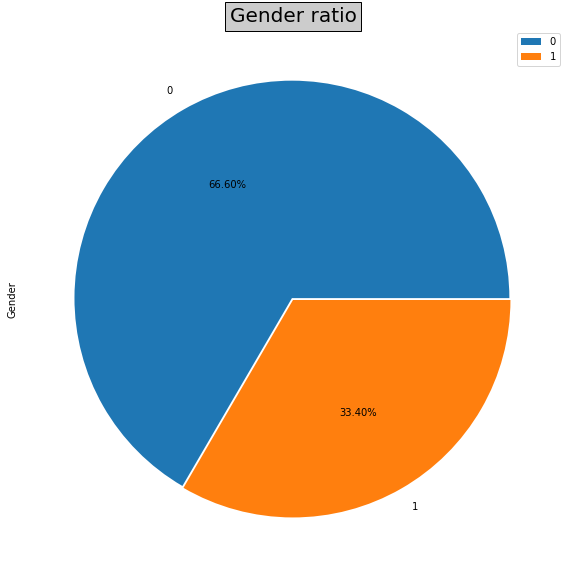

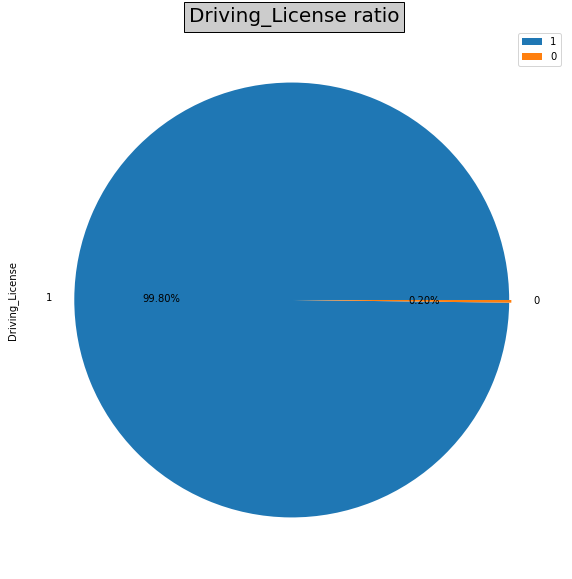

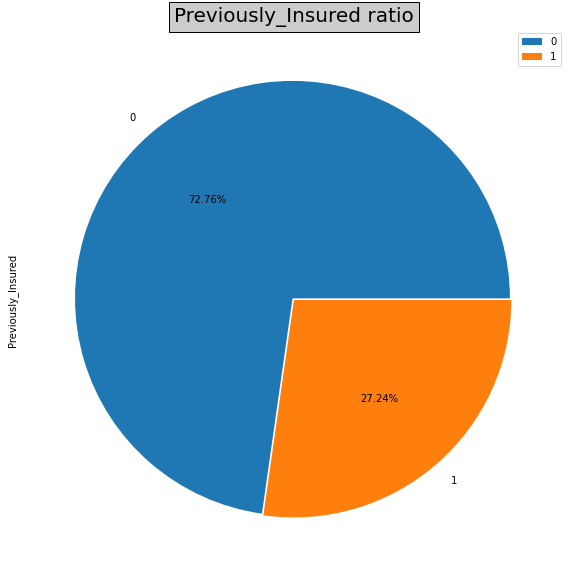

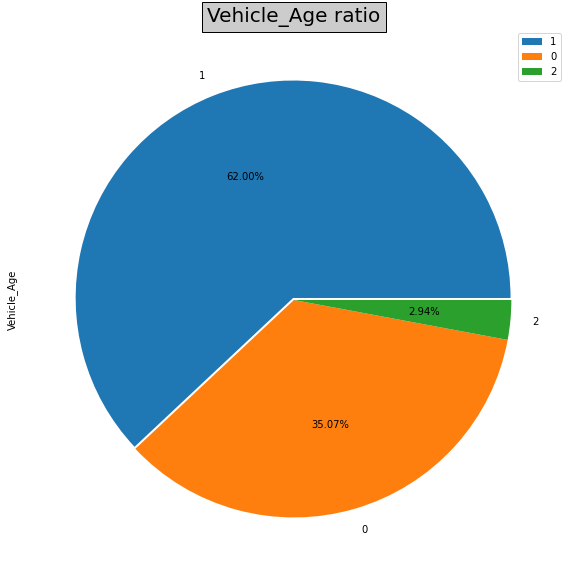

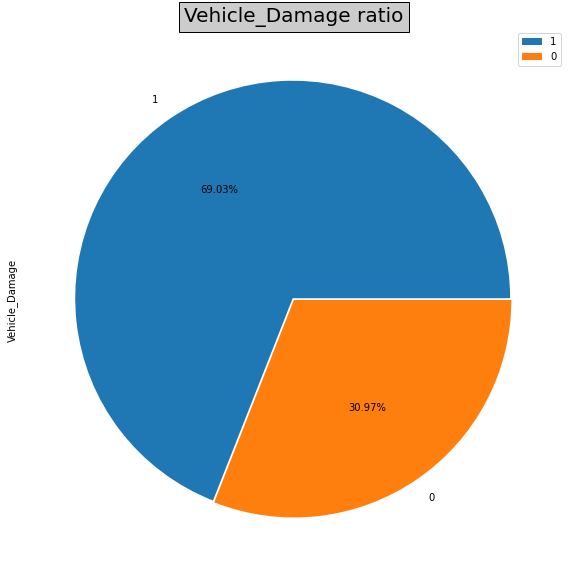

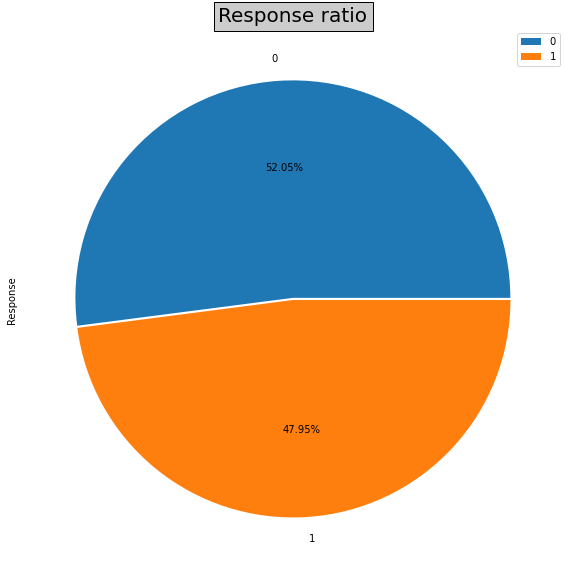

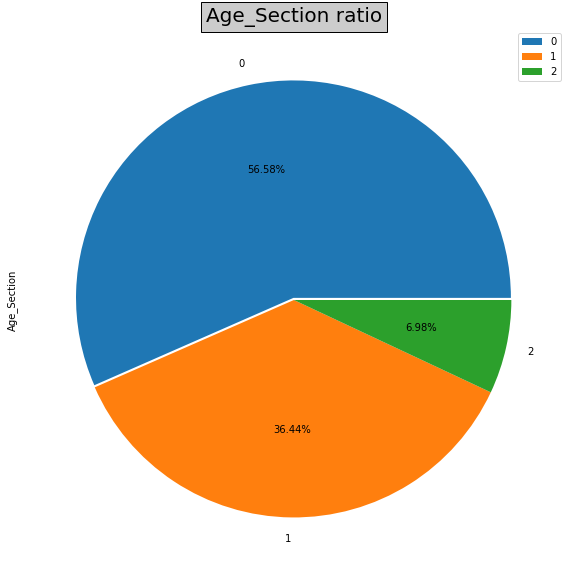

In [674]:
for c in categorical_features:
  make_pieplot(insurance[c],c,f"{c} ratio")

here we note that:
- there are very less number of peoples not having driving liscence
- there are only 26.17% of people who have insured previously
- there are comaparitively lesser number of peoples belonging to age group 60-80

###Bivariate Analysis

####Finding relation between our target feature and categorical features using cross tab

In [675]:
categorical_features

['Gender',
 'Driving_License',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Response',
 'Age_Section']

In [676]:
def category_comparision(data,indep,dep):
  var_response = pd.crosstab(insurance[indep],insurance[dep])
  var_response.plot(kind = 'bar',y = list(var_response.columns),figsize = (8,5))
  plt.show()

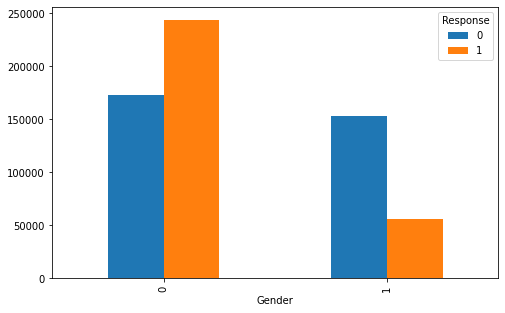

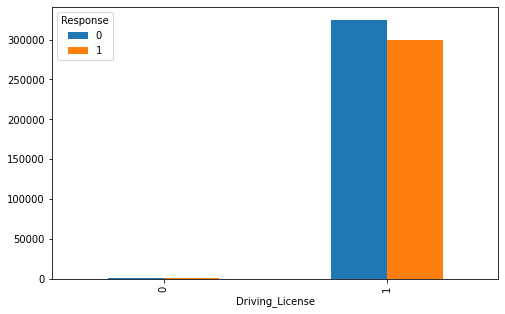

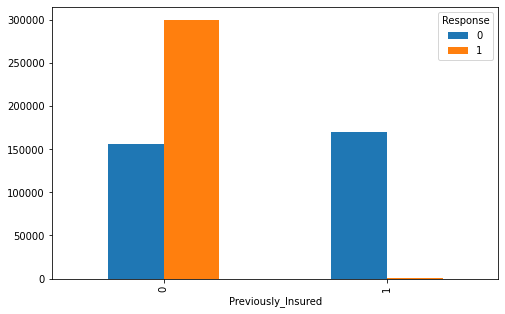

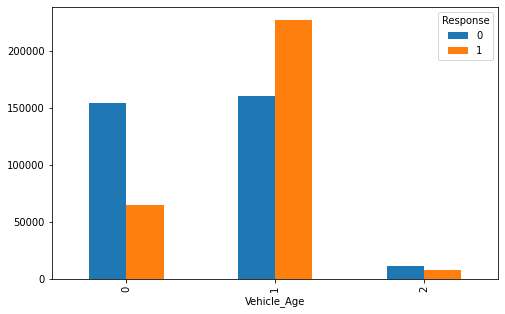

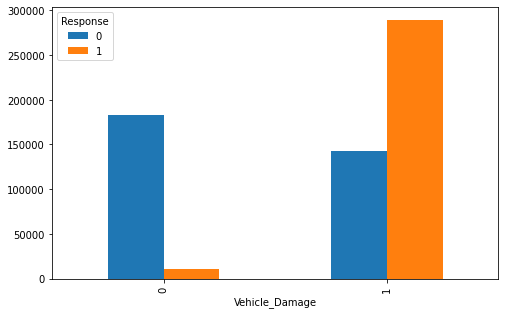

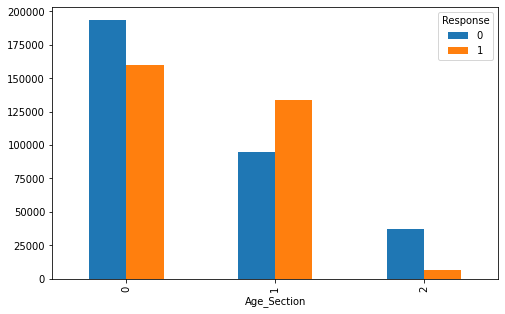

In [677]:
independent_categorical_features=[c for c in categorical_features if c not in ["Response"] ]

for c in independent_categorical_features:
  category_comparision(insurance,c,"Response")

##Model Building

In [678]:
corr_class=abs((insurance.corr())["Response"]).sort_values(ascending=False)
independent_var=(corr_class.index)[2:]
dependent_var=["Response"]

In [679]:
def model_checking(original,predicted,labels=["possibility1","possibility2"]):
  from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
  model_accuracy=accuracy_score(predicted,original)
  print("The accuracy of model is= ", model_accuracy,"\n")
  rocauc_score=roc_auc_score(original,predicted)
  print("The roc_auc score of model is= ", rocauc_score,"\n")
  print("Confusion matrix: \n")
  cm=confusion_matrix(original,predicted)
  print(cm)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

In [680]:
from sklearn.model_selection import train_test_split
x=insurance[independent_var].copy()  #independent features
y=insurance["Response"].copy()       #dependent features
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0,stratify=y)

###Logistic regression

In [681]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [682]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(fit_intercept=True, max_iter=10000)
logistic.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [683]:
train_predict=logistic.predict_proba(x_train)[:,1]
test_predict=logistic.predict_proba(x_test)[:,1]

In [684]:
train_predicted=logistic.predict(x_train)
test_predicted=logistic.predict(x_test)

The accuracy of model is=  0.8085061747388148 

The roc_auc score of model is=  0.81085029900828 

Confusion matrix: 

[[196328  64179]
 [ 31665 208335]]


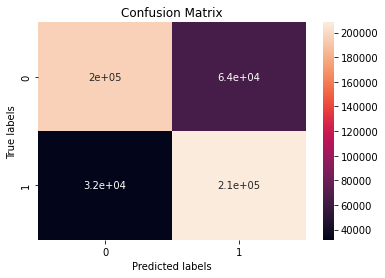

In [685]:
model_checking(y_train, train_predicted,labels=["0","1"])

The accuracy of model is=  0.8114715449103711 

The roc_auc score of model is=  0.8137523550140494 

Confusion matrix: 

[[49372 15755]
 [ 7835 52165]]


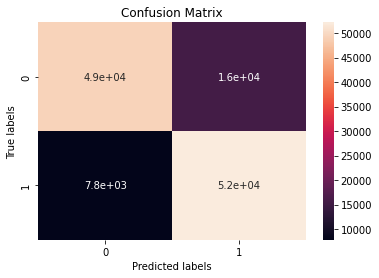

In [686]:
model_checking(y_test, test_predicted,labels=["0","1"])

In [687]:
def predict_value(val1,val2,probability,p1=0.5):
  """
  this function will check whether the value will be val1 or val2, depending on the probability.
  In this we can decide our own threshold probability, by default p1 is 0.5
  """
  predicted=[]
  for i in probability:
    if i[0] <=p1:
      predicted.append(val2)
    else:
      predicted.append(val1)
  
  return predicted

  

In [688]:
y_train_predicted_proba=logistic.predict_proba(x_train)
y_train_predicted=predict_value(0,1,y_train_predicted_proba,0.6)

y_test_predicted_proba=logistic.predict_proba(x_test)
y_test_predicted=predict_value(0,1,y_test_predicted_proba,0.6)

The accuracy of model is=  0.7999068944090693 

The roc_auc score of model is=  0.804684901173481 

Confusion matrix: 

[[179247  81260]
 [ 18888 221112]]


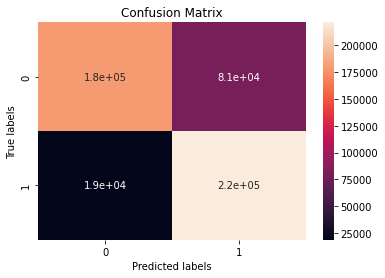

In [689]:
model_checking(y_train, y_train_predicted,labels=["0","1"])

###Decesion Tree

In [690]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [691]:
#fitting on train data
dtree=DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=20,max_depth=10,random_state=0)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=20,
                       random_state=0)

In [692]:
test_predicted=dtree.predict(x_test)
train_predicted=dtree.predict(x_train)

The accuracy of model is=  0.8354168872763018 

The roc_auc score of model is=  0.8370355498284756 

Confusion matrix: 

[[207762  52745]
 [ 29630 210370]]


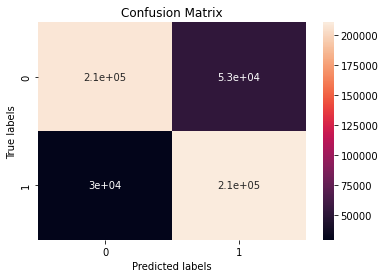

In [693]:
model_checking(y_train, train_predicted,labels=["0","1"])

The accuracy of model is=  0.8383881975912473 

The roc_auc score of model is=  0.8399939575751992 

Confusion matrix: 

[[52154 12973]
 [ 7249 52751]]


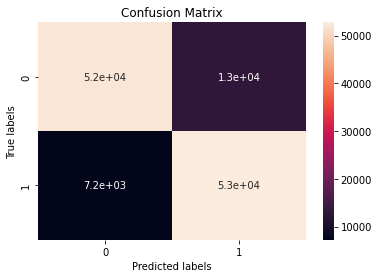

In [694]:
model_checking(y_test, test_predicted,labels=["0","1"])

###Gradient boosting

In [ ]:
#gradient boosting
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
#grid_values = {'n_estimators':[50, 80, 100], 'max_depth':[6, 6, 8]}
#model5 = GridSearchCV(gbc, param_grid = grid_values, scoring = 'roc_auc', cv=5)

gbc.fit(x_train,y_train)


In [ ]:
test_predicted=gbc.predict(x_test)
train_predicted=gbc.predict(x_train)

In [ ]:
model_checking(y_train, train_predicted,labels=["0","1"])

In [ ]:
model_checking(y_test, test_predicted,labels=["0","1"])